# Data Exploratory

In [41]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [42]:
df = pd.read_csv("nba_player_stats_C_Rami.csv")
df.head()

,Player,Team,Points,Season
0,Luka Dončić,DAL,2370.0,2024
1,Shai Gilgeous-Alexander,OKC,2254.0,2024
2,Giannis Antetokounmpo,MIL,2222.0,2024
3,Jalen Brunson,NYK,2212.0,2024
4,Nikola Jokić,DEN,2085.0,2024


               Player Team  Points  Season
7185  Dennis Schröder  ATL   183.0    2014
6294  Dennis Schröder  ATL   768.0    2015
5662  Dennis Schröder  ATL   879.0    2016
4996  Dennis Schröder  ATL  1414.0    2017
4333  Dennis Schröder  ATL  1301.0    2018
3646  Dennis Schröder  OKC  1224.0    2019
2964  Dennis Schröder  OKC  1229.0    2020
2305  Dennis Schröder  LAL   941.0    2021
1547  Dennis Schröder  BOS   704.0    2022
1546  Dennis Schröder  2TM   867.0    2022
1548  Dennis Schröder  HOU   163.0    2022
878   Dennis Schröder  LAL   830.0    2023
85    Dennis Schröder  TOR   698.0    2024
84    Dennis Schröder  2TM  1122.0    2024
86    Dennis Schröder  BRK   424.0    2024


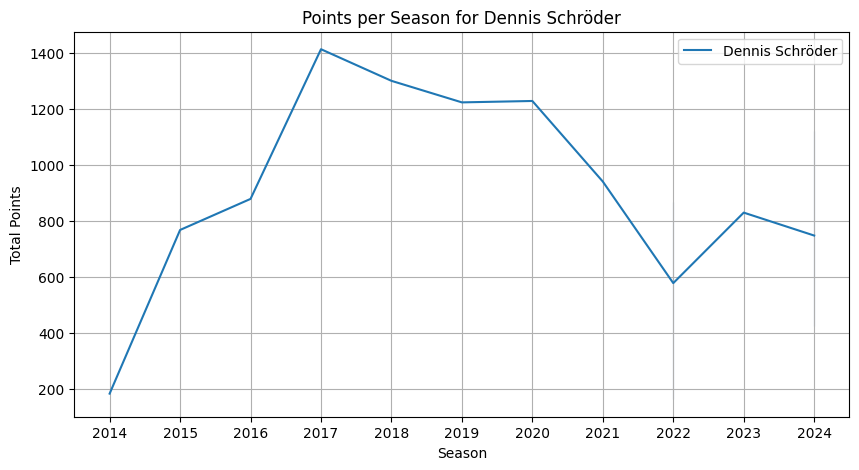

In [43]:
def get_player_stats(player_name, df):

    # Filter the dataset for the given player
    player_data = df[df['Player'].str.lower() == player_name.lower()]
    
    if player_data.empty:
        print(f"No data found for player: {player_name}")
        return None
    
    # Sort by season
    player_data = player_data.sort_values(by='Season', ascending=True)
    
    # Print the table
    print(player_data)

    #Plotting the data
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=player_data['Season'], y=player_data['Points'], label=player_name)
    plt.xlabel("Season")
    plt.ylabel("Total Points")
    plt.title(f"Points per Season for {player_name}")
    plt.xticks(player_data['Season'].unique())
    plt.grid(True)
    plt.show()

player_name = input("Enter player name: ")
get_player_stats(player_name, df)

C:\Users\ramic\AppData\Local\Temp\ipykernel_102088\1889331262.py:59: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  gdf['geometry'] = [Point(xy) for xy in zip(gdf['Longitude'], gdf['Latitude'])]


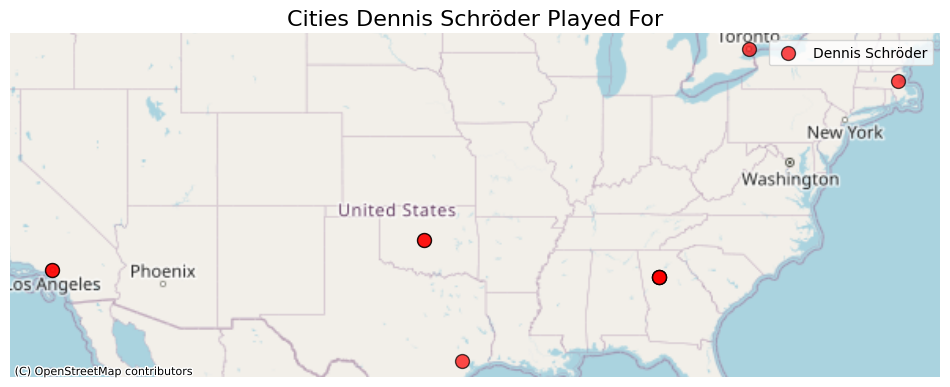

In [44]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
import pandas as pd

#Dictionary mapping NBA teams to cities and their approximate coordinates
team_city_mapping = {
    "ATL": ("Atlanta", -84.3880, 33.7490),
    "BOS": ("Boston", -71.0589, 42.3601),
    "BKN": ("Brooklyn", -73.9442, 40.6782),
    "CHA": ("Charlotte", -80.8431, 35.2271),
    "CHI": ("Chicago", -87.6298, 41.8781),
    "CLE": ("Cleveland", -81.6944, 41.4993),
    "DAL": ("Dallas", -96.7970, 32.7767),
    "DEN": ("Denver", -104.9903, 39.7392),
    "DET": ("Detroit", -83.0458, 42.3314),
    "GSW": ("San Francisco", -122.4194, 37.7749),
    "HOU": ("Houston", -95.3698, 29.7604),
    "IND": ("Indianapolis", -86.1581, 39.7684),
    "LAC": ("Los Angeles", -118.2437, 34.0522),
    "LAL": ("Los Angeles", -118.2437, 34.0522),
    "MEM": ("Memphis", -90.0490, 35.1495),
    "MIA": ("Miami", -80.1918, 25.7617),
    "MIL": ("Milwaukee", -87.9065, 43.0389),
    "MIN": ("Minneapolis", -93.2650, 44.9778),
    "NOP": ("New Orleans", -90.0715, 29.9511),
    "NYK": ("New York", -74.0060, 40.7128),
    "OKC": ("Oklahoma City", -97.5164, 35.4676),
    "ORL": ("Orlando", -81.3792, 28.5383),
    "PHI": ("Philadelphia", -75.1652, 39.9526),
    "PHX": ("Phoenix", -112.0740, 33.4484),
    "POR": ("Portland", -122.6765, 45.5152),
    "SAC": ("Sacramento", -121.4944, 38.5816),
    "SAS": ("San Antonio", -98.4936, 29.4241),
    "TOR": ("Toronto", -79.3832, 43.6532),
    "UTA": ("Salt Lake City", -111.8910, 40.7608),
    "WAS": ("Washington", -77.0369, 38.9072)
}

def plotcities(player_name, df):
    player_data = df[df['Player'].str.lower() == player_name.lower()]
    
    if player_data.empty:
        print(f"No data found for player: {player_name}")
        return
    
    teams = player_data['Team']
    
    # Get city coordinates
    cities = [(team_city_mapping[team][0], team_city_mapping[team][1], team_city_mapping[team][2]) for team in teams if team in team_city_mapping]

    if not cities:
        print(f"No mapped cities found for {player_name}.")
        return

    # Convert to GeoDataFrame
    gdf = gpd.GeoDataFrame(cities, columns=['City', 'Longitude', 'Latitude'])
    gdf['geometry'] = [Point(xy) for xy in zip(gdf['Longitude'], gdf['Latitude'])]
    gdf = gdf.set_geometry('geometry').set_crs(epsg=4326).to_crs(epsg=3857)

    # Assign colors based on amount of points scored
    #gdf['color'] = gdf['Points'].apply(lambda p: 'green' if p < 500 else 'blue' if p < 1250 else 'red')

    # Plot
    fig, ax = plt.subplots(figsize=(12, 8))
    gdf.plot(ax=ax, marker='o', color='red', markersize=100, alpha=0.7, edgecolor='black', label=player_name)

    # Add basemap
    ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

    ax.set_title(f"Cities {player_name} Played For", fontsize=16)
    ax.set_axis_off()
    plt.legend()
    plt.show()

# Example usage
plotcities(player_name, df)
